In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# needed libraries

In [ ]:
# Nifty 50 index stock symbols definition
stocks = ['HINDUNILVR.NS', 'TATASTEEL.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'SBIN.NS']

In [ ]:
data = {}

In [ ]:
for indx in stocks:
    data[indx] = yf.download(indx, period='6mo')
    # downloading the data needed

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
nifty_df = pd.concat([data[indx]['Close'].rename(indx) for indx in stocks], axis=1)

In [ ]:
percent_change = nifty_df.pct_change() * 100

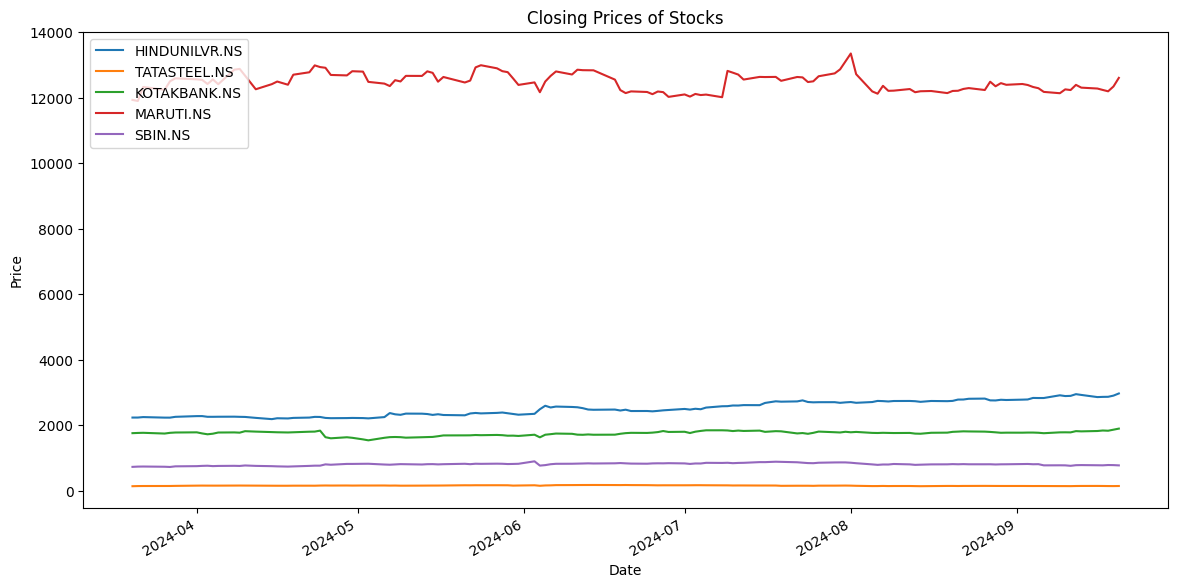

In [ ]:
# closing prices plot using matplotlib
nifty_df.plot(figsize=(14, 7), title='Closing Prices of Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

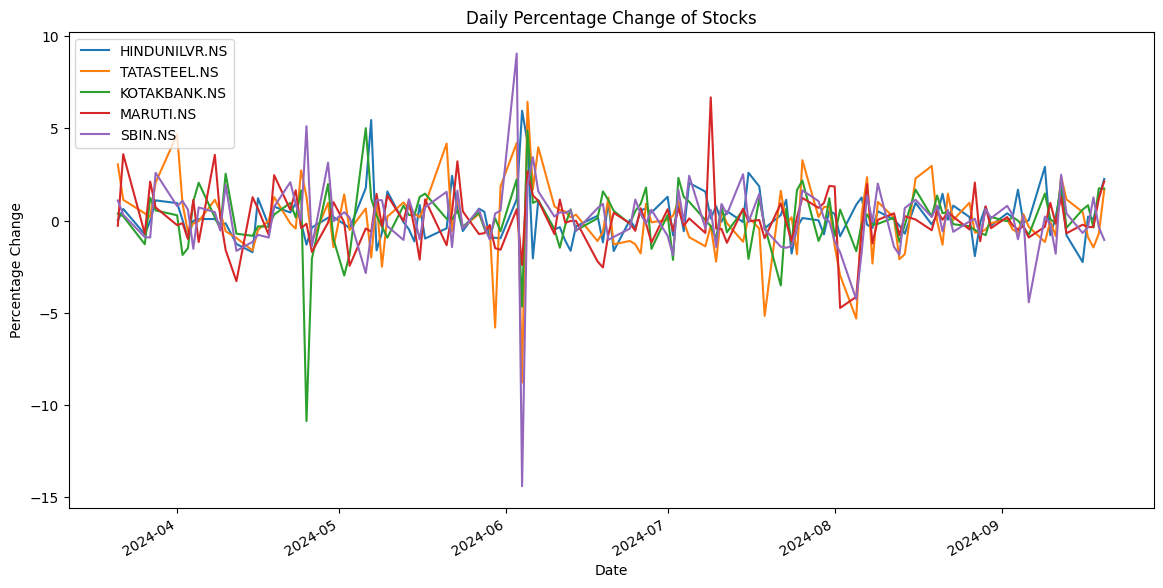

In [ ]:
# percentage changes plot using matplotlib
percent_change.plot(figsize=(14, 7), title='Daily Percentage Change of Stocks')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(loc='upper left')
plt.show()

In [ ]:
avg_mov = nifty_df.rolling(window=20).mean() # using rolling window to calculate the mean

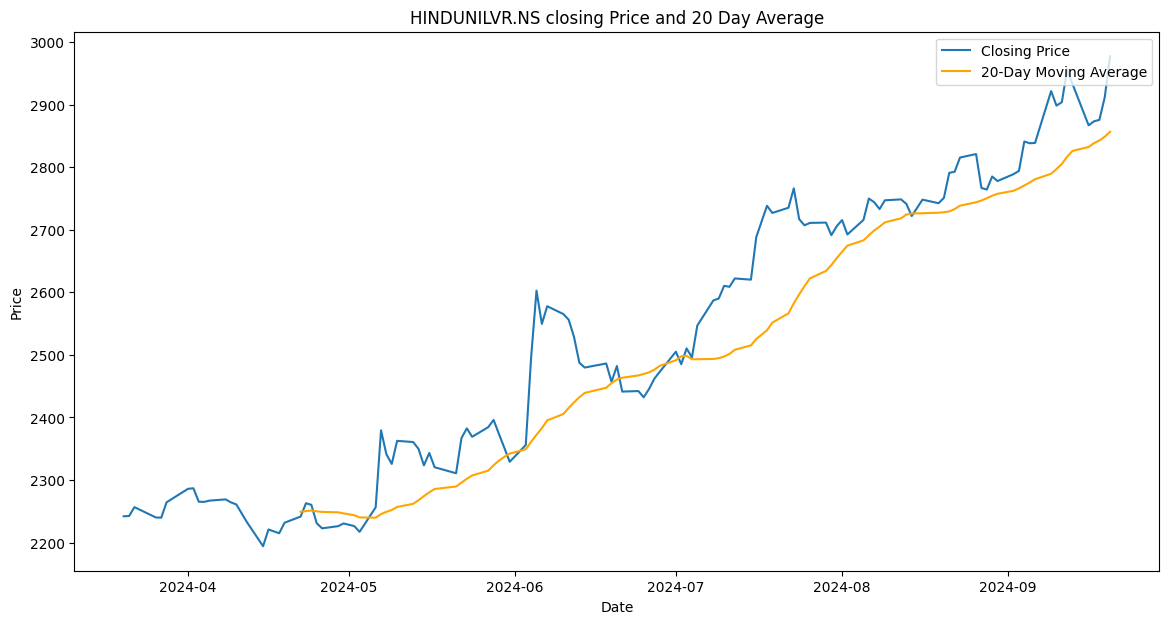

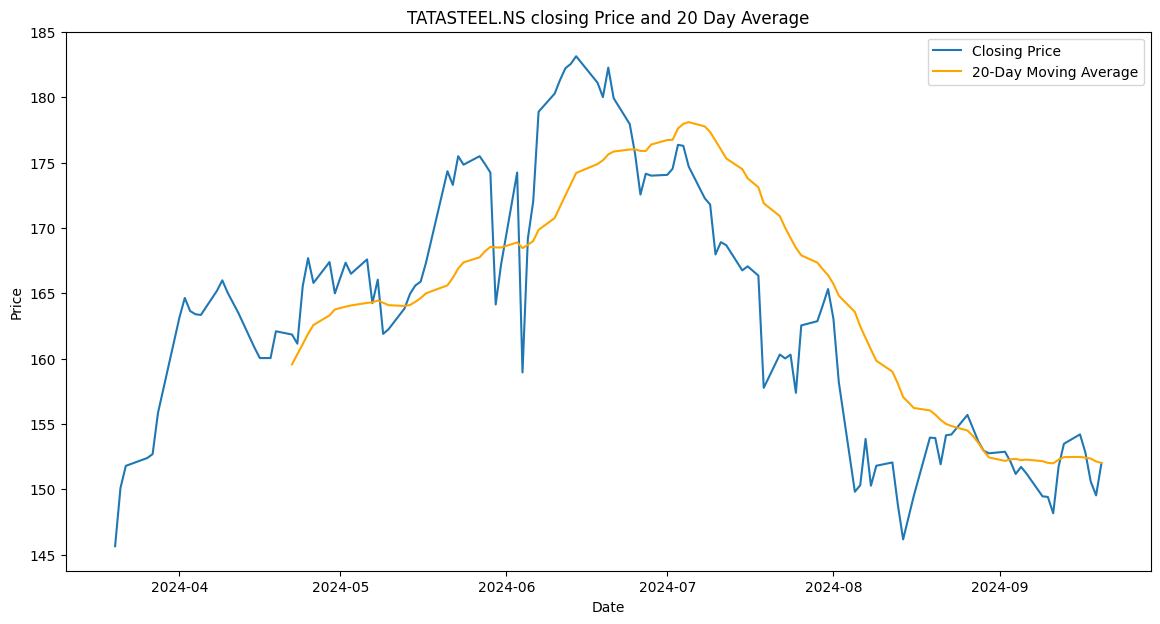

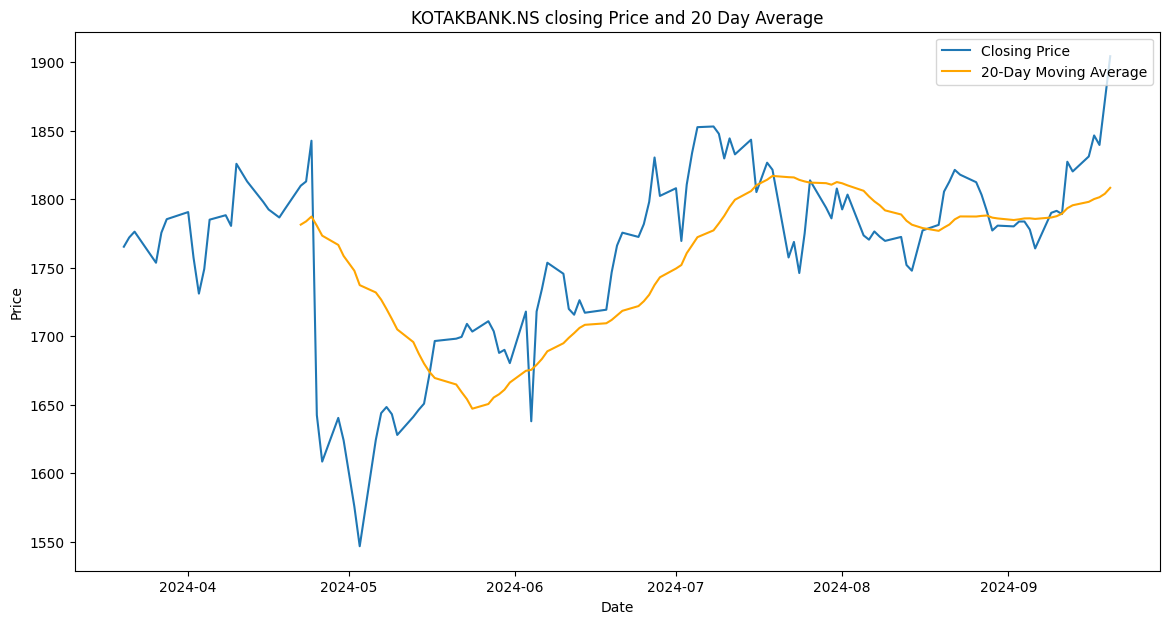

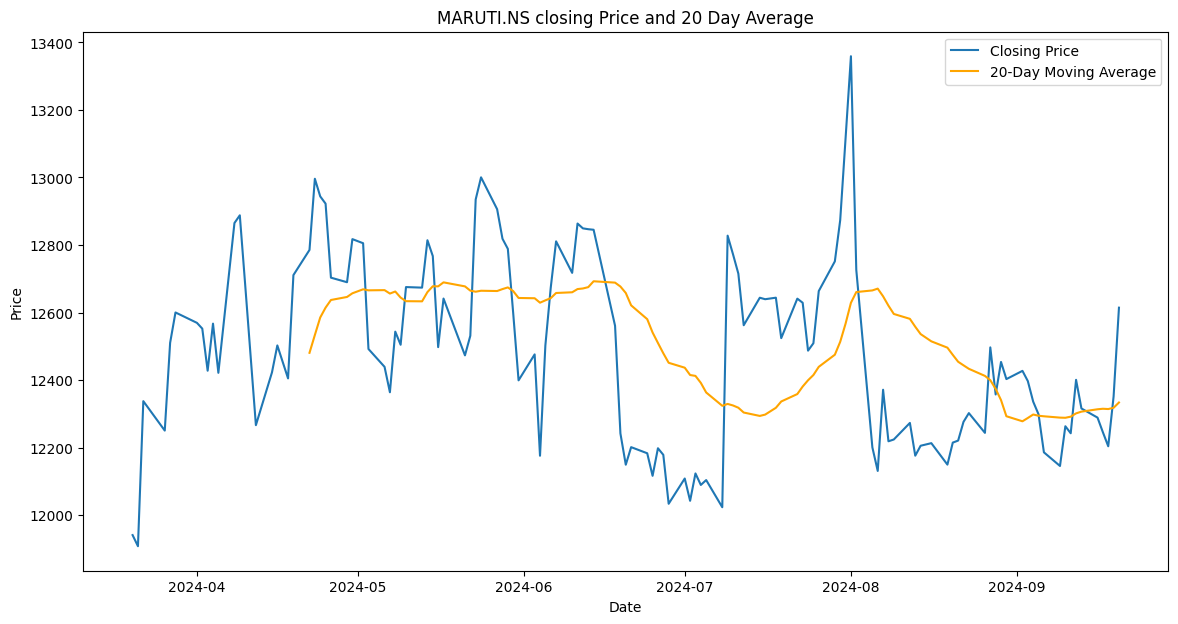

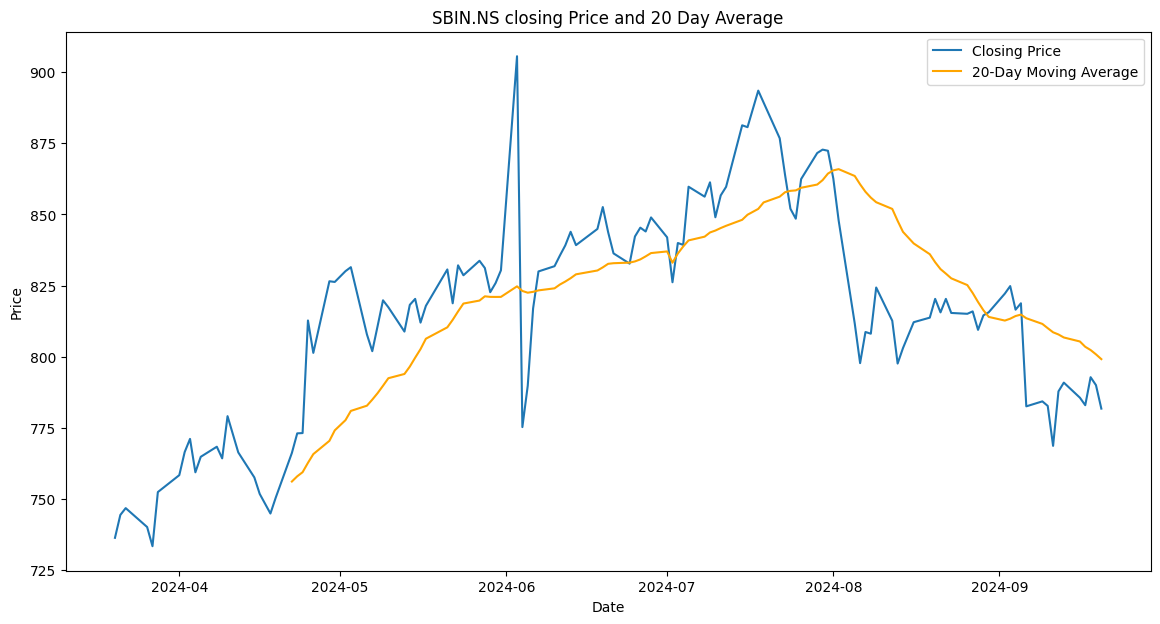

In [ ]:
for index in stocks:
    plt.figure(figsize=(14, 7))
    plt.plot(nifty_df[index], label='Closing Price')
    plt.plot(avg_mov[index], label='20-Day Moving Average', color='orange')
    plt.title(f'{index} closing Price and 20 Day Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
sbin_df = yf.download('SBIN.NS', period='5y')
# downloading enough data that can be used to create a trading strategy
# Calculate SMAs
sbin_df['SMA50'] = sbin_df['Close'].rolling(window=50).mean()
sbin_df['SMA200'] = sbin_df['Close'].rolling(window=200).mean()

# check for NaN values to make sure they dont affect the plotting
print(sbin_df[['SMA50', 'SMA200']].isna().sum())

[*********************100%***********************]  1 of 1 completed

SMA50      49
SMA200    199
dtype: int64


In [ ]:
# drop NaN
sbin_df.dropna(subset=['SMA50', 'SMA200'], inplace=True)
print(sbin_df.shape)

(1039, 8)


In [ ]:
sbin_df['Signal'] = 0
sbin_df['Signal'] = np.where(sbin_df['SMA50'] > sbin_df['SMA200'], 1, 0)

# calculate the positions
sbin_df['Position'] = sbin_df['Signal'].diff()

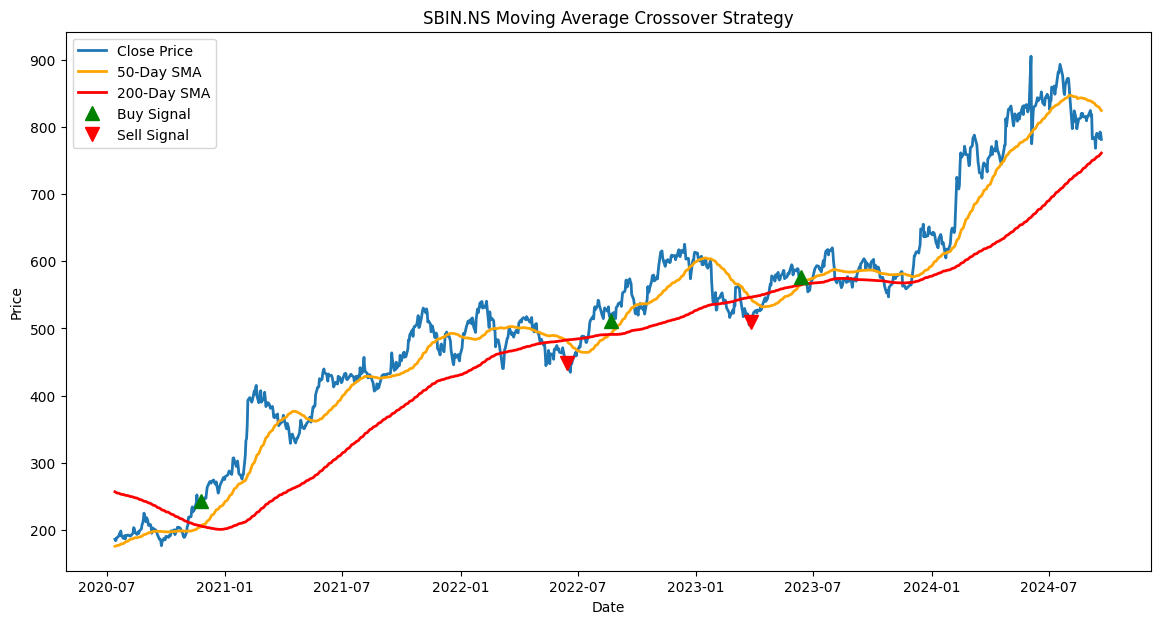

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(sbin_df['Close'], label='Close Price', linewidth=2)
plt.plot(sbin_df['SMA50'], label='50-Day SMA', color='orange', linewidth=2)
plt.plot(sbin_df['SMA200'], label='200-Day SMA', color='red', linewidth=2)
plt.plot(sbin_df[sbin_df['Position'] == 1].index,
         sbin_df['Close'][sbin_df['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(sbin_df[sbin_df['Position'] == -1].index,
         sbin_df['Close'][sbin_df['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('SBIN.NS Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [ ]:
# daily returns calculation using the percentage change
sbin_df['Market Return'] = sbin_df['Close'].pct_change()

# calculating the returns of the suggested strategy
sbin_df['Strategy Return'] = sbin_df['Market Return'] * sbin_df['Position'].shift(1)

# cumulative market return calculations
sbin_df['Cumulative Market Return'] = (1 + sbin_df['Market Return']).cumprod()
sbin_df['Cumulative Strategy Return'] = (1 + sbin_df['Strategy Return']).cumprod()

# dropping nan values because of the shift function
sbin_df.dropna(inplace=True)

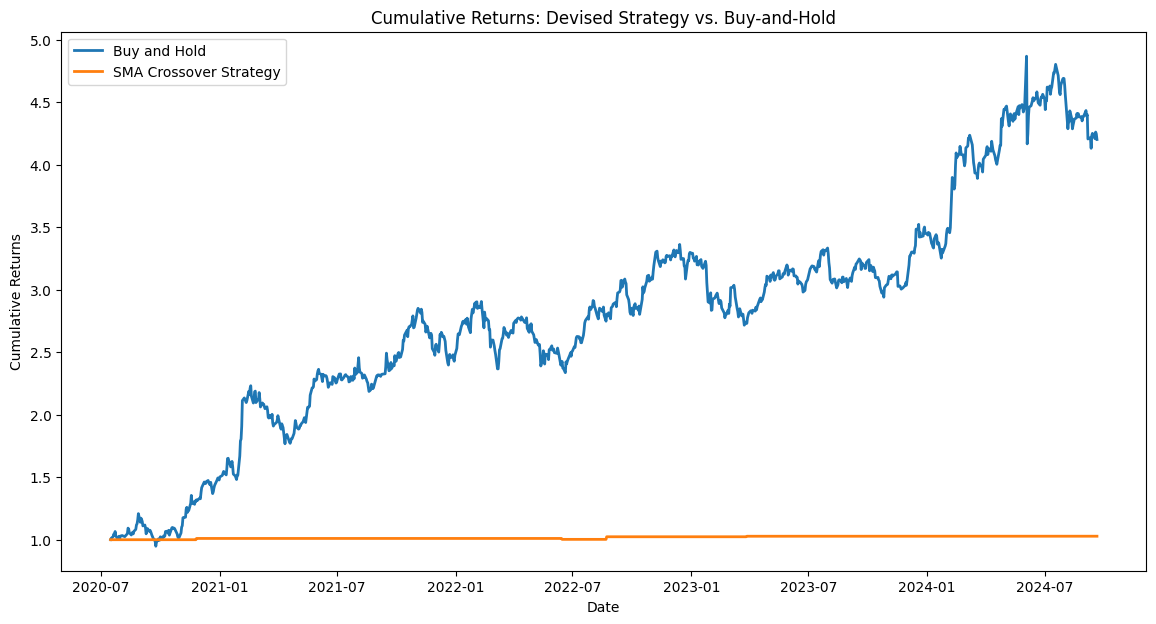

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(sbin_df['Cumulative Market Return'], label='Buy and Hold', linewidth=2)
plt.plot(sbin_df['Cumulative Strategy Return'], label='SMA Crossover Strategy', linewidth=2)
plt.title('Cumulative Returns: Devised Strategy vs. Buy-and-Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
